# Steps for Data Exploration (EDA) in the Backpack Prediction Challenge





# Upload the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')





In [2]:
train = pd.read_csv("/content/train.csv")
extra_train = pd.read_csv("/content/training_extra.csv")
test = pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")

print("Main Training Data:")
display(train.head())

print("\nExtra Training Data:")
display(extra_train.head())


Main Training Data:


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312



Extra Training Data:


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


# Step 2: Check for Missing Values







In [3]:
print("Missing Values in Main Train:\n", train.isnull().sum())
print("Missing Values in Extra Train:\n", extra_train.isnull().sum())


Missing Values in Main Train:
 id                        0
Brand                   442
Material                385
Size                    309
Compartments              0
Laptop Compartment      311
Waterproof              319
Style                   368
Color                   460
Weight Capacity (kg)      6
Price                     0
dtype: int64
Missing Values in Extra Train:
 id                        0
Brand                   416
Material                341
Size                    286
Compartments              1
Laptop Compartment      376
Waterproof              328
Style                   351
Color                   418
Weight Capacity (kg)      6
Price                     1
dtype: int64


# Step 3: Check for Duplicates



In [4]:
print("Duplicates in Main Train:", train.duplicated().sum())
print("Duplicates in Extra Train:", extra_train.duplicated().sum())


Duplicates in Main Train: 0
Duplicates in Extra Train: 0


# Step 4: Compare Columns


In [5]:
print("Columns in Main Train:", train.columns.tolist())
print("Columns in Extra Train:", extra_train.columns.tolist())


Columns in Main Train: ['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price']
Columns in Extra Train: ['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price']


# Step 5: Check the Target Variable Distribution (Price)

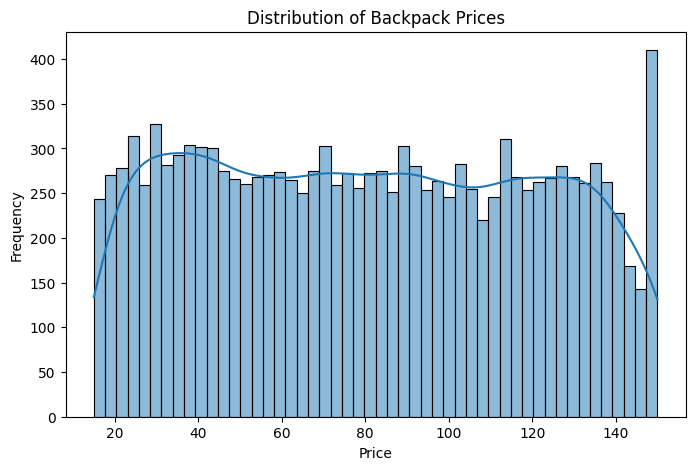

In [6]:

plt.figure(figsize=(8,5))
sns.histplot(train["Price"], bins=50, kde=True)
plt.title("Distribution of Backpack Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


# Step 6: Boxplot to Detect Outliers in Price


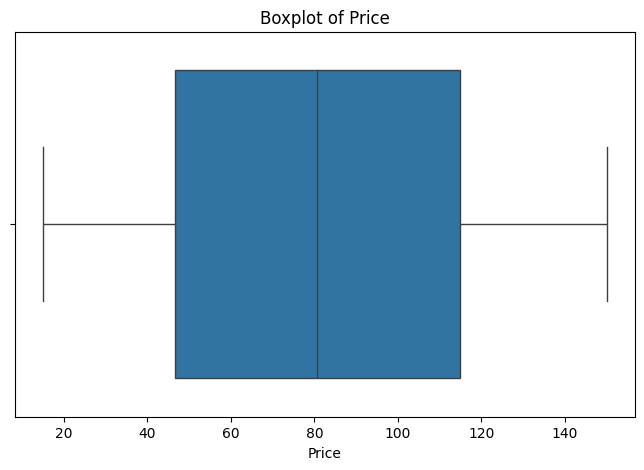

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train["Price"])
plt.title("Boxplot of Price")
plt.show()


# Step 7: Feature Correlation Analysis


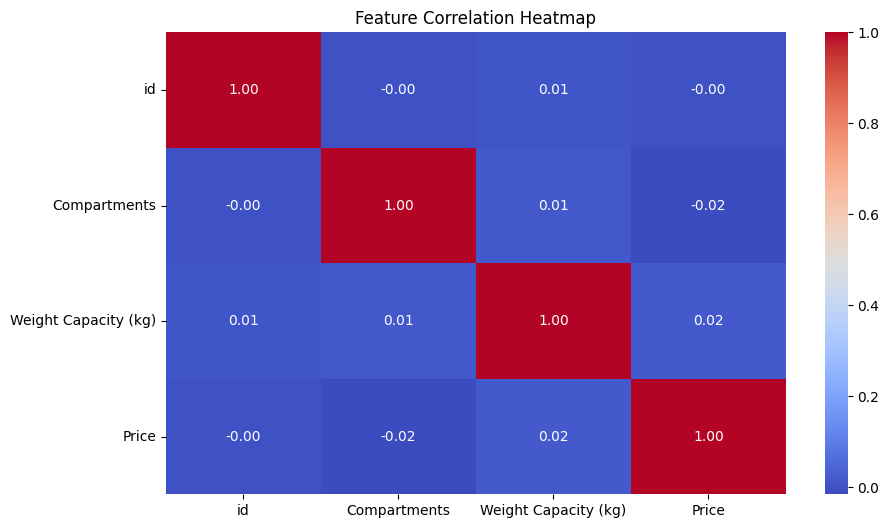

In [8]:
numerical_features = train.select_dtypes(include=np.number).columns
corr_matrix = train[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 8: Relationship Between Price and Numerical Features


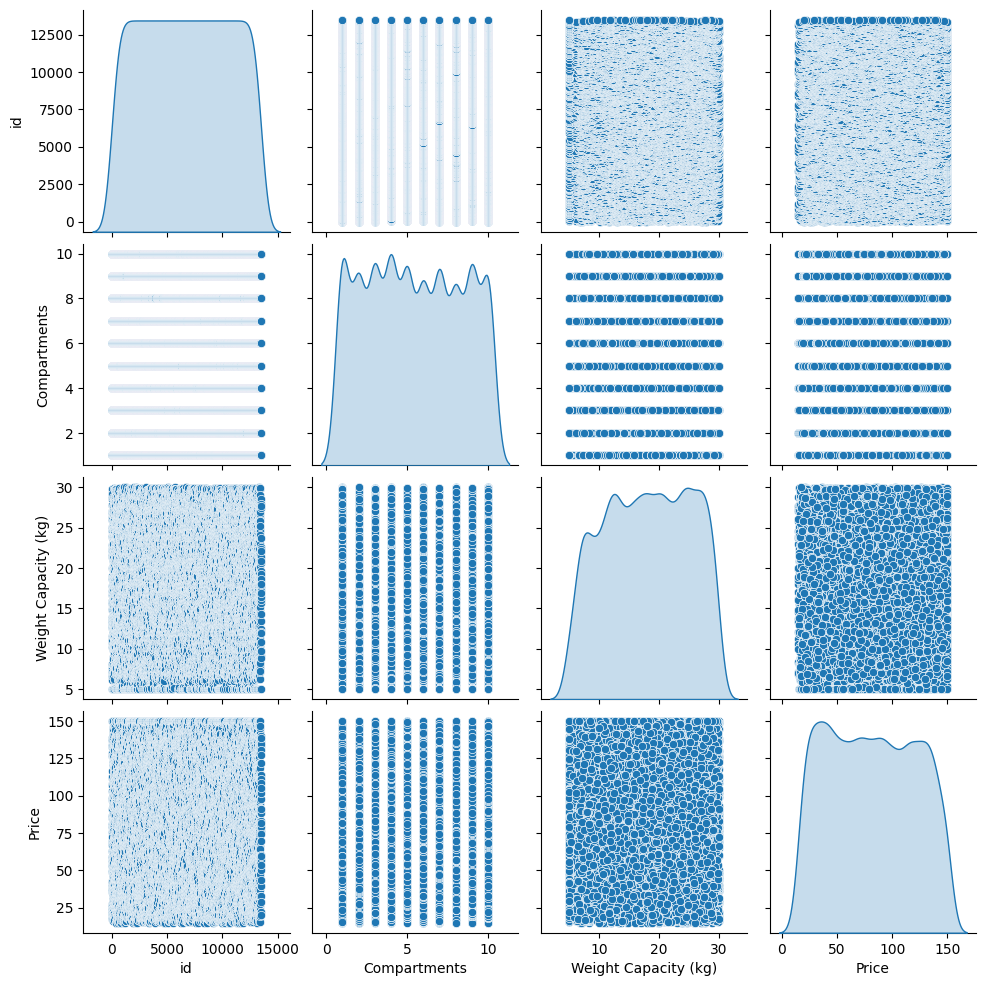

In [9]:
sns.pairplot(train, diag_kind="kde")
plt.show()


# Step 9: Analyze Categorical Features

In [10]:
for col in train.select_dtypes(include=['object']).columns:
    print(f"{col} unique values: {train[col].nunique()}")
    print(train[col].value_counts())


Brand unique values: 5
Brand
Adidas          2712
Under Armour    2703
Nike            2556
Puma            2555
Jansport        2515
Name: count, dtype: int64
Material unique values: 4
Material
Polyester    3708
Leather      3255
Nylon        3211
Canvas       2924
Name: count, dtype: int64
Size unique values: 3
Size
Medium    4663
Large     4443
Small     4068
Name: count, dtype: int64
Laptop Compartment unique values: 2
Laptop Compartment
Yes    6760
No     6412
Name: count, dtype: int64
Waterproof unique values: 2
Waterproof
Yes    6623
No     6541
Name: count, dtype: int64
Style unique values: 3
Style
Messenger    4507
Tote         4339
Backpack     4269
Name: count, dtype: int64
Color unique values: 6
Color
Pink     2317
Gray     2254
Blue     2181
Red      2119
Black    2080
Green    2072
Name: count, dtype: int64


# Step 10: Merge Both Datasets


In [11]:
merged_train = train.merge(extra_train, on="id", how="left")
print(merged_train.head())


   id       Brand_x Material_x  Size_x  Compartments_x Laptop Compartment_x  \
0   0      Jansport    Leather  Medium             7.0                  Yes   
1   1      Jansport     Canvas   Small            10.0                  Yes   
2   2  Under Armour    Leather   Small             2.0                  Yes   
3   3          Nike      Nylon   Small             8.0                  Yes   
4   4        Adidas     Canvas  Medium             1.0                  Yes   

  Waterproof_x    Style_x Color_x  Weight Capacity (kg)_x  ...  Brand_y  \
0           No       Tote   Black               11.611723  ...      NaN   
1          Yes  Messenger   Green               27.078537  ...      NaN   
2           No  Messenger     Red               16.643760  ...      NaN   
3           No  Messenger   Green               12.937220  ...      NaN   
4          Yes  Messenger   Green               17.749338  ...      NaN   

  Material_y Size_y Compartments_y  Laptop Compartment_y Waterproof_y Styl

In [12]:
train.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

#  Preprocessing and Feature Engineering for Training

#  Step 1: Drop Unnecessary Columns

In [13]:
train.drop(columns=['id'], inplace=True)


# Step 2: Handling Missing Values

In [14]:
print(train.isnull().sum())


Brand                   442
Material                385
Size                    309
Compartments              0
Laptop Compartment      311
Waterproof              319
Style                   368
Color                   460
Weight Capacity (kg)      6
Price                     0
dtype: int64


In [15]:
train['Weight Capacity (kg)'].fillna(train['Weight Capacity (kg)'].median(), inplace=True)

categorical_cols = ['Brand', 'Material', 'Size', 'Style', 'Color']
for col in categorical_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)

train['Laptop Compartment'].fillna('No', inplace=True)
train['Waterproof'].fillna('No', inplace=True)


# Step 3: Encoding Categorical Variables

# Label Encoding for Ordinal Features (Size)

In [16]:

le = LabelEncoder()
train['Size'] = le.fit_transform(train['Size'])


# One-Hot Encoding for Nominal Features

In [17]:
train = pd.get_dummies(train, columns=['Brand', 'Material', 'Style', 'Color'], drop_first=True)


# Step 4: Convert Boolean Features to Numeric

In [18]:
train['Laptop Compartment'] = train['Laptop Compartment'].map({'Yes': 1, 'No': 0})
train['Waterproof'] = train['Waterproof'].map({'Yes': 1, 'No': 0})


# Step 5: Handle Outliers in Price

In [19]:

Q1 = train["Price"].quantile(0.25)
Q3 = train["Price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train = train[(train["Price"] >= lower_bound) & (train["Price"] <= upper_bound)]


# Step 6: Feature Scaling (Normalize Numeric Data)

In [20]:

scaler = StandardScaler()
train['Weight Capacity (kg)'] = scaler.fit_transform(train[['Weight Capacity (kg)']])


# Step 7: Split Data for Training

In [21]:

X = train.drop(columns=['Price'])
y = train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 8:Scaling & Normalization

In [22]:

scaler = StandardScaler()
X_train[['Weight Capacity (kg)']] = scaler.fit_transform(X_train[['Weight Capacity (kg)']])
X_test[['Weight Capacity (kg)']] = scaler.transform(X_test[['Weight Capacity (kg)']])


In [23]:

scaler = MinMaxScaler()
X_train[['Weight Capacity (kg)']] = scaler.fit_transform(X_train[['Weight Capacity (kg)']])
X_test[['Weight Capacity (kg)']] = scaler.transform(X_test[['Weight Capacity (kg)']])


#  Develop Baseline Models

# Baseline Model 1: Mean Prediction (Naïve Approach)

In [24]:

y_pred_baseline = [y_train.mean()] * len(y_test)

mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print(f"Baseline MAE: {mae_baseline:.2f}")
print(f"Baseline RMSE: {rmse_baseline:.2f}")

Baseline MAE: 33.95
Baseline RMSE: 39.21


#  Baseline Model 2: Dummy Regressor

In [25]:


dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)
y_pred_dummy = dummy_reg.predict(X_test)

mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))

print(f"Dummy Regressor MAE: {mae_dummy:.2f}")
print(f"Dummy Regressor RMSE: {rmse_dummy:.2f}")

Dummy Regressor MAE: 33.95
Dummy Regressor RMSE: 39.21


# Baseline Model 3: Linear Regression

In [26]:


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))


print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")

Linear Regression MAE: 33.99
Linear Regression RMSE: 39.23


# Build and Tune More Complex Models

# 1. Random Forest Regressor (Baseline Tree Model)

In [27]:

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest MAE: 34.03
Random Forest RMSE: 39.34


# 2. XGBoost (Gradient Boosting Model)



In [28]:

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

XGBoost MAE: 34.31
XGBoost RMSE: 39.89


#  3. LightGBM (Alternative to XGBoost, Faster)

In [29]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"LightGBM MAE: {mae_lgb:.2f}")
print(f"LightGBM RMSE: {rmse_lgb:.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 10786, number of used features: 19
[LightGBM] [Info] Start training from score 80.979464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

# 4. Hyperparameter Tuning with RandomizedSearchCV

In [30]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=20, cv=5, scoring='neg_mean_absolute_error',
                                   n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

y_pred_tuned = random_search.best_estimator_.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"Tuned Random Forest MAE: {mae_tuned:.2f}")
print(f"Tuned Random Forest RMSE: {rmse_tuned:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
Tuned Random Forest MAE: 33.99
Tuned Random Forest RMSE: 39.23


#  5. Neural Networks with TensorFlow/Keras

In [31]:


model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

y_pred_nn = model.predict(X_test).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error


mae_nn = np.sqrt(mean_absolute_error(y_test, y_pred_nn))
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))

print(f"Neural Network MAE: {mae_nn:.2f}")
print(f"Neural Network RMSE: {rmse_nn:.2f}")


Epoch 1/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 54.1846 - val_loss: 34.8652
Epoch 2/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35.0643 - val_loss: 34.7754
Epoch 3/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 34.4132 - val_loss: 34.9737
Epoch 4/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34.3756 - val_loss: 34.4347
Epoch 5/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34.1716 - val_loss: 34.3197
Epoch 6/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.9257 - val_loss: 34.9770
Epoch 7/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34.1060 - val_loss: 34.3819
Epoch 8/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.6989 - val_loss: 34.2154
Epoch 9/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.8452 - val_loss: 34.2167
Epoch 10/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.5324 - val_loss: 34.5531
Epoch 11/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.8309 - val_loss: 34.3190
Epoch 12/50
338/338 ━━━━━━━━━━

# Validation of Model

# 1. Cross-Validation (K-Fold CV)

In [32]:

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-Validation MAE: {-cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation MAE: 33.70 ± 0.37


#  2. Learning Curves


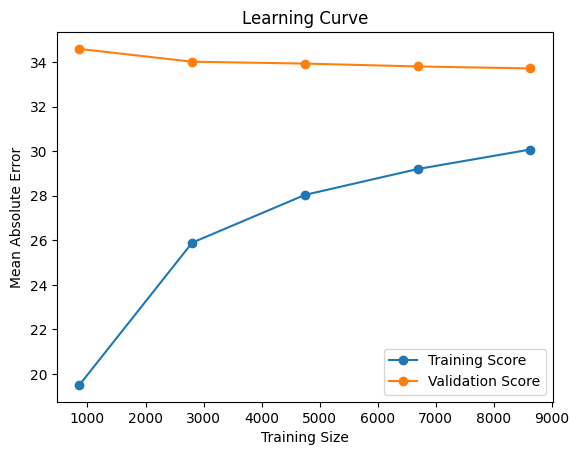

In [33]:


train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

train_scores = -train_scores.mean(axis=1)
val_scores = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores, label="Training Score", marker="o")
plt.plot(train_sizes, val_scores, label="Validation Score", marker="o")
plt.xlabel("Training Size")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.title("Learning Curve")
plt.show()


# 3. Residual Analysis

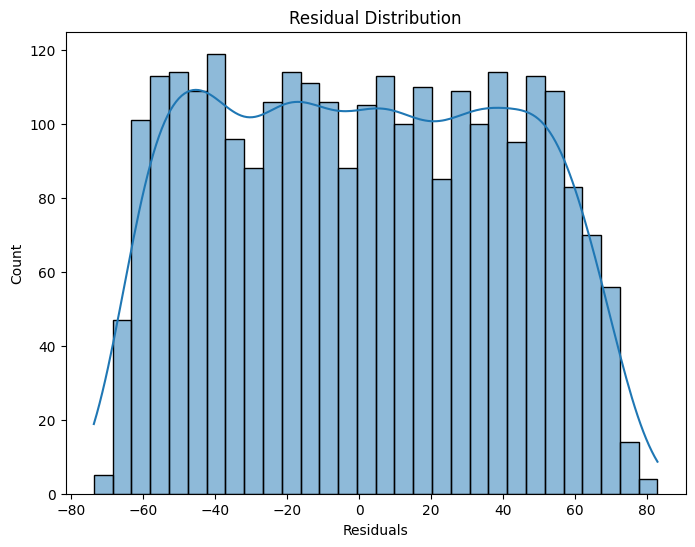

In [34]:

y_pred = model.fit(X_train, y_train).predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()


# 4. Feature Importance (For Tree-Based Models)

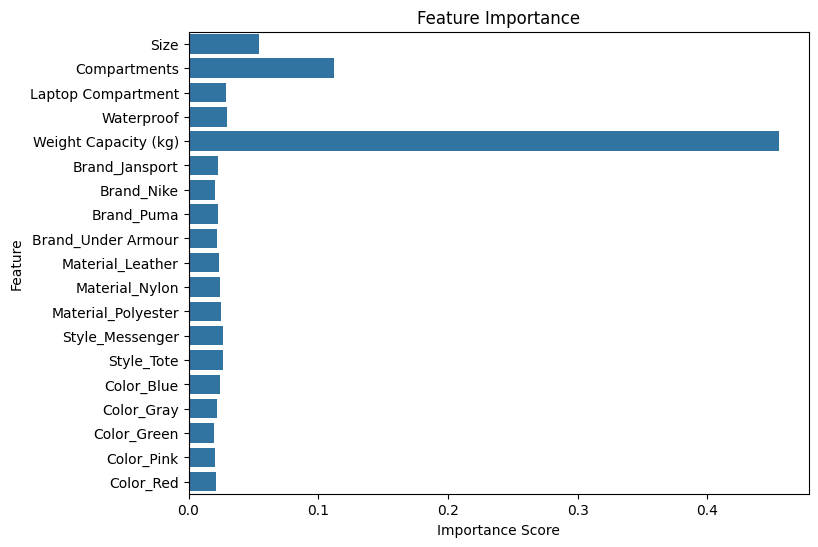

In [35]:
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


# 5. Test Set Evaluation

In [36]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final Test Set Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Final Test Set Metrics:
MAE: 34.03
RMSE: 39.34
R² Score: -0.01


# Final  Submission of Backpack Prediction Challenge

In [37]:
def preprocess_data(df):

    df.drop(columns=['id'], inplace=True)

    df['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].median(), inplace=True)

    categorical_cols = ['Brand', 'Material', 'Size', 'Style', 'Color']
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    df['Laptop Compartment'].fillna('No', inplace=True)
    df['Waterproof'].fillna('No', inplace=True)

    le = LabelEncoder()
    df['Size'] = le.fit_transform(df['Size'])

    df = pd.get_dummies(df, columns=['Brand', 'Material', 'Style', 'Color'], drop_first=True)

    df['Laptop Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})
    df['Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0})


    scaler = StandardScaler()
    df['Weight Capacity (kg)'] = scaler.fit_transform(df[['Weight Capacity (kg)']])

    return df

In [38]:
test_data = pd.read_csv("/content/test.csv")

test_ids = test_data["id"]

test_data = preprocess_data(test_data)

X_test_final = test_data

final_predictions = model.predict(X_test_final)

submission = pd.DataFrame({
    "id": test_ids,
    "Price": final_predictions
})

submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved: submission.csv")

✅ Submission file saved: submission.csv


In [39]:
df = pd.read_csv("/content/submission.csv")

In [40]:
df

,id,Price
0,300000,79.146703
1,300001,75.890250
2,300002,73.320579
3,300003,88.676879
4,300004,74.925746
...,...,...
199995,499995,76.878804
199996,499996,76.145074
199997,499997,77.195004
199998,499998,76.614077
